# Handling Imbalanced Dataset

## 1. Up Sampling

## 2. Down Sampling


In [1]:
import numpy as np
import pandas as pd

np.random.seed(123)  # ensures same randomness

n_sample = 1000
class_0_ratio = 0.9
n_class0 = int(n_sample * class_0_ratio)  # 900 datapoints
n_class1 = n_sample - n_class0  # 100 datapoints

In [2]:
n_class0, n_class1

(900, 100)

In [3]:
# creating dataframe with imbalanced data

class_0 = pd.DataFrame(
    {
        "feature1": np.random.normal(loc=0, scale=1, size=n_class0),
        "feature2": np.random.normal(loc=0, scale=1, size=n_class0),
        "target": [0] * n_class0,  # List of 0's with n_class0 length
    }
)
class_1 = pd.DataFrame(
    {
        "feature1": np.random.normal(loc=2, scale=1, size=n_class1),
        "feature2": np.random.normal(loc=2, scale=1, size=n_class1),
        "target": [1] * n_class1,
    }
)

In [8]:
df = pd.concat([class_0, class_1])
df.tail()

,feature1,feature2,target
95,1.376371,2.845701,1
96,2.239810,0.880077,1
97,1.131760,1.640703,1
98,2.902006,0.390305,1
99,2.697490,2.013570,1


In [11]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

## Upsampling


In [12]:
df_majority = df[df["target"] == 0]
df_minority = df[df["target"] == 1]

from sklearn.utils import resample

df_minority_upsampled = resample(
    df_minority, replace=True, n_samples=len(df_majority), random_state=42
)

In [14]:
df_minority_upsampled.shape

(900, 3)

In [18]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [19]:
df_upsampled["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

## DownSampling


In [26]:
from sklearn.utils import resample

# replace = False  ==> So That No Duplicate Rows select as Downsampling
df_majority_downsample = resample(
    df_majority, replace=False, n_samples=len(df_minority), random_state=42
)
df_majority_downsample

,feature1,feature2,target
70,0.468439,1.720920,0
827,1.089165,-0.464899,0
231,0.753869,-0.969798,0
588,0.588686,-0.704720,0
39,0.283627,1.012868,0
...,...,...,...
398,-0.168426,0.553775,0
76,-0.403366,0.081491,0
196,-0.269293,0.611238,0
631,-0.295829,0.671673,0


In [27]:
df_majority_downsample["target"].value_counts()

target
0    100
Name: count, dtype: int64

In [28]:
df_downsample = pd.concat([df_majority_downsample, df_minority])
df_downsample["target"].value_counts()

target
0    100
1    100
Name: count, dtype: int64

# SMOTE (Synthetic Minority Oversampling Technique)
n_samples => no. of data
n_features => no. of Independent Variables
n_redundant =>

In [33]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.9],
    random_state=12,
)

In [34]:
import pandas as pd

df1 = pd.DataFrame(X, columns=["f1", "f2"])
df2 = pd.DataFrame(y, columns=["target"])
final_df = pd.concat([df1, df2], axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [36]:
final_df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

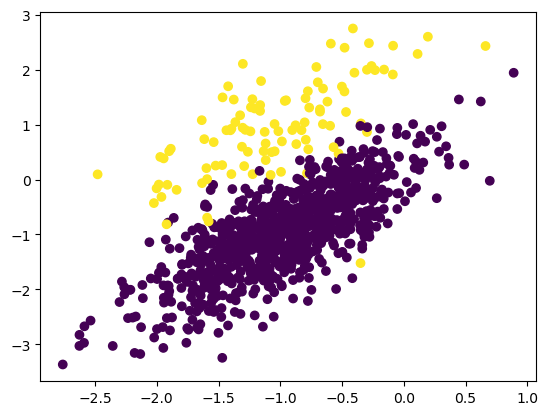

In [38]:
import matplotlib.pyplot as plt

plt.scatter(final_df["f1"], final_df["f2"], c=final_df["target"])

In [40]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(final_df[["f1", "f2"]], final_df["target"])

In [41]:
X.shape

(1800, 2)

In [42]:
y.shape

(1800,)

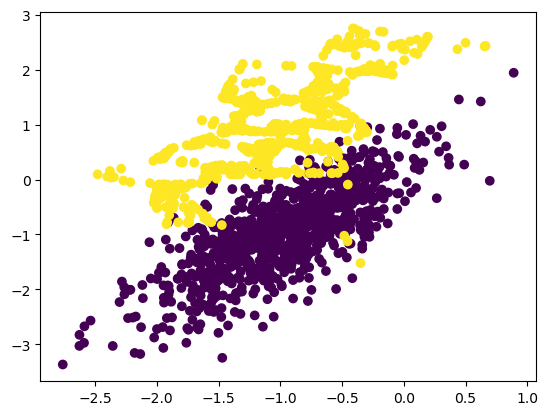

In [47]:
df1 = pd.DataFrame(X, columns=["f1", "f2"])
df2 = pd.DataFrame(y, columns=["target"])
final_df = pd.concat([df1, df2], axis=1)

plt.scatter(final_df["f1"], final_df["f2"], c=final_df["target"])